In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import EngFormatter, FuncFormatter

fm_data_fcast = pd.read_csv('./FinModel-DRAFT-042623-TEST_fcast.csv')
fm_data_flat = pd.read_csv('./FinModel-DRAFT-042623-TEST_flat.csv')

In [53]:
#fm_data_fcast = fm_data_fcast.drop(index=0).assign(date = lambda x: pd.to_datetime(x.month)).set_index('date')
#fm_data_fcast = fm_data_fcast.drop(index=0).assign(date = lambda x: pd.to_datetime(x.month)).set_index('date')

In [54]:
# Prep dataframes

# Remove detailed column title row
fm_data_fcast = fm_data_fcast.drop(index=0)

# convert month to datetime and set as index
fm_data_fcast['month'] = pd.to_datetime(fm_data_fcast['month'])
fm_data_fcast.set_index('month', inplace=True)

# convert other cols to numeric
non_num_cols = ['act_fcast']
cols_to_convert = fm_data_fcast.columns.difference(non_num_cols)
fm_data_fcast[cols_to_convert] = fm_data_fcast[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [55]:
# Prep dataframes

# Remove detailed column title row
fm_data_flat = fm_data_flat.drop(index=0)

# convert month to datetime and set as index
fm_data_flat['month'] = pd.to_datetime(fm_data_flat['month'])
fm_data_flat.set_index('month', inplace=True)

# convert other cols to numeric
non_num_cols = ['act_fcast']
cols_to_convert = fm_data_flat.columns.difference(non_num_cols)
fm_data_flat[cols_to_convert] = fm_data_flat[cols_to_convert].apply(pd.to_numeric, errors='coerce')


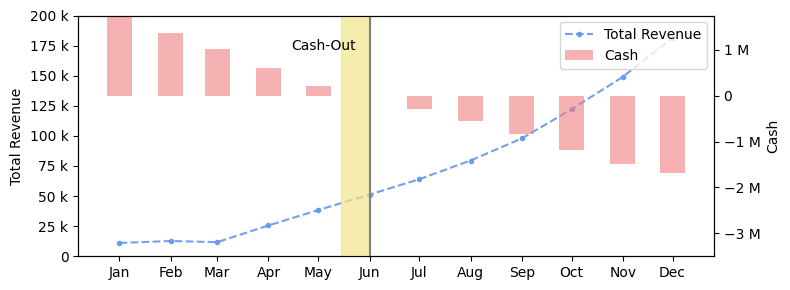

In [141]:
fig, ax1 = plt.subplots(sharex=True,figsize=(8,3))
dates_focus = fm_data_fcast.index.year.isin([2023])
line1 = ax1.plot(fm_data_fcast[dates_focus].index, fm_data_fcast[dates_focus]['tot_rev'], '--.', color='cornflowerblue', alpha=0.9)
ax1.set_ylabel('Total Revenue')
ax2 = ax1.twinx()
ax2.set_ylabel('Cash')
bar1 = ax2.bar(fm_data_fcast[dates_focus].index, fm_data_fcast[dates_focus]['cash'], color='lightcoral', alpha=0.6, width=15)
ax1.yaxis.set_major_formatter(EngFormatter())
ax2.yaxis.set_major_formatter(EngFormatter())
ax1.set_ylim([0,200000])
ax2.set_ylim(-3500000,1750000)
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.legend(handles=[line1[0], bar1[0]], labels=['Total Revenue', 'Cash'], loc='upper right')
plt.grid(axis='x')
plt.axvspan(pd.to_datetime('2023-05-15'), pd.to_datetime('2023-06-01'), color='khaki', alpha=0.7)
plt.axvline(pd.to_datetime('2023-06-01'), color='grey', linestyle='-')  # Add a vertical line at x=0
plt.text(pd.to_datetime('2023-04-15'), 1000000, 'Cash-Out')
fig.tight_layout()

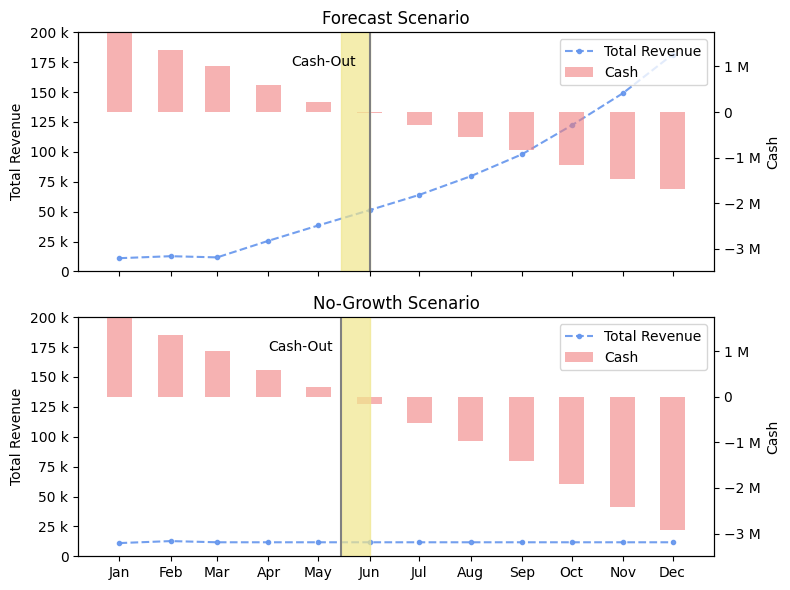

In [153]:
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(8,6))
ax3 = axes[0]
ax1 = axes[1]
dates_focus = fm_data_flat.index.year.isin([2023])
line1 = ax1.plot(fm_data_flat[dates_focus].index, fm_data_flat[dates_focus]['tot_rev'], '--.', color='cornflowerblue', alpha=0.9)
ax1.set_ylabel('Total Revenue')
ax2 = ax1.twinx()
ax2.set_ylabel('Cash')
bar1 = ax2.bar(fm_data_flat[dates_focus].index, fm_data_flat[dates_focus]['cash'], color='lightcoral', alpha=0.6, width=15)
ax1.yaxis.set_major_formatter(EngFormatter())
ax2.yaxis.set_major_formatter(EngFormatter())
ax1.set_ylim([0,200000])
ax2.set_ylim(-3500000,1750000)
ax1.set_title('No-Growth Scenario')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.legend(handles=[line1[0], bar1[0]], labels=['Total Revenue', 'Cash'], loc='upper right')
plt.grid(axis='x')
plt.axvspan(pd.to_datetime('2023-05-15'), pd.to_datetime('2023-06-01'), color='khaki', alpha=0.7)
plt.axvline(pd.to_datetime('2023-05-15'), color='grey', linestyle='-')  # Add a vertical line at x=0
plt.text(pd.to_datetime('2023-04-01'), 1000000, 'Cash-Out')

dates_focus = fm_data_fcast.index.year.isin([2023])
line1 = ax3.plot(fm_data_fcast[dates_focus].index, fm_data_fcast[dates_focus]['tot_rev'], '--.', color='cornflowerblue', alpha=0.9)
ax3.set_ylabel('Total Revenue')
ax4 = ax3.twinx()
ax4.set_ylabel('Cash')
bar1 = ax4.bar(fm_data_fcast[dates_focus].index, fm_data_fcast[dates_focus]['cash'], color='lightcoral', alpha=0.6, width=15)
ax3.yaxis.set_major_formatter(EngFormatter())
ax4.yaxis.set_major_formatter(EngFormatter())
ax3.set_title('Forecast Scenario')
ax3.set_ylim([0,200000])
ax4.set_ylim(-3500000,1750000)
ax3.xaxis.set_major_locator(mdates.MonthLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax3.legend(handles=[line1[0], bar1[0]], labels=['Total Revenue', 'Cash'], loc='upper right')
plt.grid(axis='x')
plt.axvspan(pd.to_datetime('2023-05-15'), pd.to_datetime('2023-06-01'), color='khaki', alpha=0.7)
plt.axvline(pd.to_datetime('2023-06-01'), color='grey', linestyle='-')  # Add a vertical line at x=0
plt.text(pd.to_datetime('2023-04-15'), 1000000, 'Cash-Out')

fig.tight_layout()
fig.savefig('fcast_scen.png')